In [ ]:
!pip install scipy==1.9.0

In [1]:
import scipy
print(scipy.__version__)

1.9.0


In [ ]:
!pip install smt

In [27]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import Symbol, nsolve, solve
#from sympy.solvers import solve

import time
import pickle
from google.colab import drive
drive.mount('/content/drive')
# check scikit-learn version
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import os
import json
import pickle
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from smt.sampling_methods import LHS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load data

In [3]:
#change the path to your dataset
data = pd.read_excel('drive/MyDrive/Nina_DoE/datasets_AgNPs_final_DT.xlsx')
pd.set_option('display.max_rows', None)

In [4]:
data

,Nucleation constant(min-1)),Growth constant (M-1min-1)),storage temp.((℃)),DE/RE,Reynolds number,size AgNPs(1),size AgNPs(2),size AgNPs(3)
0,0.0128,26.01,20,0.41,3.3950,19.050,22.0800,23.650
1,0.0015,44.81,0,0.00,3.3950,11.100,13.0300,12.000
2,0.0015,44.81,20,0.41,3.3950,8.530,12.2000,11.160
3,0.0128,26.01,0,0.00,3.3950,17.620,16.7100,16.990
4,0.0015,44.81,0,0.41,3.3950,5.680,7.3500,6.620
5,0.0128,26.01,20,0.00,3.3950,23.380,25.5200,24.800
6,0.0128,26.01,0,0.41,0.0849,19.830,19.8100,23.490
7,0.0015,44.81,20,0.00,0.0849,12.640,13.5400,13.540
8,0.1000,77.97,0,0.41,3.3950,4.390,3.5800,3.790
9,0.0013,37.86,20,0.00,3.3950,9.680,8.7700,9.420


In [5]:
#preprocessing copy the three repetition

repeat1 = np.array(data[['Nucleation constant(min-1))', 'Growth constant (M-1min-1))',
       'storage temp.((℃))', 'DE/RE           ', 'Reynolds number',
       'size  AgNPs(1) ']])

repeat2 = np.array(data[['Nucleation constant(min-1))', 'Growth constant (M-1min-1))',
       'storage temp.((℃))', 'DE/RE           ', 'Reynolds number',
       'size  AgNPs(2) ']])

repeat3 = np.array(data[['Nucleation constant(min-1))', 'Growth constant (M-1min-1))',
       'storage temp.((℃))', 'DE/RE           ', 'Reynolds number',
       'size  AgNPs(3) ']])

In [6]:
# X is input, y is output
X = np.array(data)[:,:5]
y = (np.array(data['size  AgNPs(1) ']) + np.array(data['size  AgNPs(2) ']) + np.array(data['size  AgNPs(3) ']))/3.

In [7]:
X.shape

(73, 5)

# polynomial regression

In [8]:
#input: T,k1,k2,Re,ratio; output:diameter



# evaluate the polynomial regression (on the training dataset)

In [9]:
poly_degree = 5

polynomial_features= PolynomialFeatures(degree=poly_degree)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

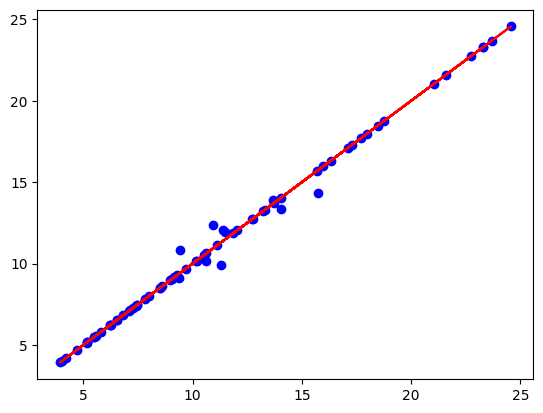

In [10]:
plt.plot(y,y_poly_pred,'bo')
plt.plot(y,y,'r')

In [11]:
#calculate the r2 score and MSE
print(r2_score(y,y_poly_pred))
print(mean_absolute_percentage_error(y,y_poly_pred))

0.9955355738346788
0.010212828452773302


# Data assimilation for the inverse modelling

In [13]:
!pip install adao
from adao import adaoBuilder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# LHS sampling in the possible area of Re and ratio

In [29]:
#using LHS to sample 100 points in the possible area of Re and ratio
n_LHS = 100 # number of sampling

xlimits = np.array([[0.,0.41],[0.0849,16.96]])
sampling = LHS(xlimits=xlimits,random_state=10)
LHS_ens = sampling(n_LHS).reshape(n_LHS,-1,1)

In [36]:
LHS_ens[10,:,:]

array([[0.21935  ],
       [1.6880345]])

In [58]:
#change the diameter size you want
y = 5 # y=3,5,10,15

#save all estimated value
analysis_value = []
analysis_state = []

#fixed parameter T, k1, k2

fix_par = [0.0011,55.51,0]


#we use all the samples in LHS_ens as background state

for i in range(n_LHS):

  x_b = LHS_ens[i,:,:].ravel()


  def f(var):
      x = np.array(fix_par + list(var))
      x_poly_test = polynomial_features.fit_transform(x.reshape(1,-1))
      y = model.predict(x_poly_test)
      return y.ravel()

  # define the background error covariance matrix
  Back_matrix = np.diag([1,10])

  case = adaoBuilder.New()
  case.set( 'AlgorithmParameters', Algorithm='3DVAR',
          Parameters = {"Minimizer" : "LBFGSB","MaximumNumberOfSteps":100,
                        "CostDecrementTolerance":1.e-5,
                            "Bounds" : [
                                          [ 0.,0.41 ],               # Bound on the first parameter
                                          [ 0.0849,16.96 ],                   # Bound on the second parameter             
                                          ],
                        "StoreSupplementaryCalculations":["CostFunctionJ","CurrentState",
                          "SimulatedObservationAtOptimum",
                          "SimulatedObservationAtBackground",
                          "JacobianMatrixAtBackground",
                          "JacobianMatrixAtOptimum",
                          "KalmanGainAtOptimum",
                          "APosterioriCovariance"]
                        } )
  case.set( 'Background',          Vector=x_b)
  case.set( 'BackgroundError',     Matrix=Back_matrix )
  case.set( 'Observation',         Vector=y )
  case.set( 'ObservationError',    ScalarSparseMatrix=0.1 )
  case.set( 'ObservationOperator', OneFunction = f)
  case.set( 'Observer',            Variable="Analysis", Template="ValuePrinter" )

  #you can record the evolution of 
  #case.setObserver(Variable="CostFunctionJ",Template="ValuePrinter")
  #case.setObserver(Variable="CostFunctionJo",Template="ValuePrinter")
  #case.setObserver(Variable="CostFunctionJb",Template="ValuePrinter")
  case.execute()

  x_a = case.get("Analysis")[-1]

  #evaluate background and analysis prediction

  par_back = np.array(fix_par + list(x_b)).reshape(1,-1)
  x_poly_back = polynomial_features.fit_transform(par_back.reshape(1,-1))

  y_back = model.predict(x_poly_back)

  par_analysis = np.array(fix_par + list(x_a)).reshape(1,-1)
  x_poly_analysis = polynomial_features.fit_transform(par_analysis.reshape(1,-1))
  y_analysis = model.predict(x_poly_analysis)

  print('x_a',x_a)
  print('y_true',y)
  print('y_back',y_back)
  print('y_analysis',y_analysis)

  analysis_value.append(y_analysis)
  analysis_state.append([x_a[0],x_a[1]])


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999689 0.08944826]
x_a [0.40999689 0.08944826]
y_true 5
y_back [1648795.42638009]
y_analysis [4.9995712]
Analysis [0.40999983 0.08944787]
x_a [0.40999983 0.08944787]
y_true 5
y_back [2497699.82171316]
y_analysis [4.99969079]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.05543039 0.41507236]
x_a [0.05543039 0.41507236]
y_true 5
y_back [15.16295814]
y_analysis [5.00109286]
Analysis [0.40999776 0.08944802]
x_a [0.40999776 0.08944802]
y_true 5
y_back [456013.40035938]
y_analysis [4.99967435]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999988 0.08944786]
x_a [0.40999988 0.08944786]
y_true 5
y_back [2342318.87281621]
y_analysis [4.99969392]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.14131554 0.7179059 ]
x_a [0.14131554 0.7179059 ]
y_true 5
y_back [-400.44948704]
y_analysis [5.00381775]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.26202582 0.1025089 ]
x_a [0.26202582 0.1025089 ]
y_true 5
y_back [77.00779427]
y_analysis [5.0003018]
Analysis [0.40999986 0.08944783]
x_a [0.40999986 0.08944783]
y_true 5
y_back [1859602.4602061]
y_analysis [4.9997064]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.17465804 0.12261775]
x_a [0.17465804 0.12261775]
y_true 5
y_back [400018.37662531]
y_analysis [5.01402337]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.05881259 0.34293395]
x_a [0.05881259 0.34293395]
y_true 5
y_back [710.08501167]
y_analysis [5.00397254]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.07725139 0.23209299]
x_a [0.07725139 0.23209299]
y_true 5
y_back [318.78891307]
y_analysis [5.00103948]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.1845049  0.11919372]
x_a [0.1845049  0.11919372]
y_true 5
y_back [112854.94798538]
y_analysis [5.00988155]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.17051495 0.12426543]
x_a [0.17051495 0.12426543]
y_true 5
y_back [73.56545048]
y_analysis [5.00508377]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.18987867 0.11756412]
x_a [0.18987867 0.11756412]
y_true 5
y_back [84.53690026]
y_analysis [4.99598789]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.16231832 0.12775844]
x_a [0.16231832 0.12775844]
y_true 5
y_back [9.14517193]
y_analysis [4.99977724]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.19743515 0.11533679]
x_a [0.19743515 0.11533679]
y_true 5
y_back [230260.50890118]
y_analysis [5.00116226]
Analysis [0.40999992 0.08944769]
x_a [0.40999992 0.08944769]
y_true 5
y_back [317671.62535286]
y_analysis [4.99978181]
Analysis [0.40999817 0.08944788]
x_a [0.40999817 0.08944788]
y_true 5
y_back [58396.03084445]
y_analysis [4.99973597]
Analysis [0.40999752 0.08944813]
x_a [0.40999752 0.08944813]
y_true 5
y_back [1267636.30191709]
y_analysis [4.99962286]
Analysis [0.35055445 4.29187606]

sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.



x_a [0.35055445 4.29187606]
y_true 5
y_back [427.76366742]
y_analysis [5.00000304]
Analysis [0.4099999  0.08944784]
x_a [0.4099999  0.08944784]
y_true 5
y_back [1954252.08267829]
y_analysis [4.99970328]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.15387972 0.13173387]
x_a [0.15387972 0.13173387]
y_true 5
y_back [21464.70838476]
y_analysis [5.01071497]
Analysis [0.40999669 0.08944833]
x_a [0.40999669 0.08944833]
y_true 5
y_back [1058443.84825841]
y_analysis [4.99953757]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999679 0.08944828]
x_a [0.40999679 0.08944828]
y_true 5
y_back [1459306.81549255]
y_analysis [4.99956159]
Analysis [0.24938307 4.40500028]
x_a [0.24938307 4.40500028]
y_true 5
y_back [131.20692696]
y_analysis [5.00000202]
Analysis [0.40999992 0.08944775]
x_a [0.40999992 0.08944775]
y_true 5
y_back [713266.39199576]
y_analysis [4.99975037]
Analysis [0.13047627 0.1465715 ]
x_a [0.13047627 0.1465715 ]
y_true 5
y_back [-3.13103426]
y_analysis [4.99996723]
Analysis [0.40999995 0.08944747]
x_a [0.40999995 0.08944747]
y_true 5
y_back [282.06359947]
y_analysis [4.99990109]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.         3.24276581]
x_a [0.         3.24276581]
y_true 5
y_back [631.87418175]
y_analysis [5.00006959]
Analysis [0.29443437 4.33570083]
x_a [0.29443437 4.33570083]
y_true 5
y_back [828.64970535]
y_analysis [5.00001353]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.14732045 0.1353097 ]
x_a [0.14732045 0.1353097 ]
y_true 5
y_back [17637.91660962]
y_analysis [5.00621552]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.27716175 0.10049425]
x_a [0.27716175 0.10049425]
y_true 5
y_back [9585.06460725]
y_analysis [4.99999442]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.17726129 0.12170195]
x_a [0.17726129 0.12170195]
y_true 5
y_back [6847.73378183]
y_analysis [5.00652586]
Analysis [0.40999988 0.08944787]
x_a [0.40999988 0.08944787]
y_true 5
y_back [2624085.40273177]
y_analysis [4.99968767]
Analysis [0.40999828 0.08944779]
x_a [0.40999828 0.08944779]
y_true 5
y_back [33107.44696387]
y_analysis [4.99977981]
Analysis [0.40999813 0.0894478 ]
x_a [0.40999813 0.0894478 ]
y_true 5
y_back [13881.53073551]
y_analysis [4.99977959]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999689 0.08944826]
x_a [0.40999689 0.08944826]
y_true 5
y_back [1367750.54404402]
y_analysis [4.99957014]
Analysis [0.40999993 0.08944745]
x_a [0.40999993 0.08944745]
y_true 5
y_back [419.15605868]
y_analysis [4.99991366]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.15414173 0.13164224]
x_a [0.15414173 0.13164224]
y_true 5
y_back [7575.93462482]
y_analysis [5.00429012]
Analysis [0.40999752 0.08944806]
x_a [0.40999752 0.08944806]
y_true 5
y_back [583781.56093813]
y_analysis [4.99965901]
Analysis [0.40999774 0.08944793]
x_a [0.40999774 0.08944793]
y_true 5
y_back [29561.91522237]
y_analysis [4.99972218]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40025559 0.0900244 ]
x_a [0.40025559 0.0900244 ]
y_true 5
y_back [299.51862653]
y_analysis [4.99984909]
Analysis [0.         3.24276484]
x_a [0.         3.24276484]
y_true 5
y_back [843.28092996]
y_analysis [5.00003042]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.19223972 0.11683547]
x_a [0.19223972 0.11683547]
y_true 5
y_back [1154330.42354694]
y_analysis [4.99961892]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.14427874 0.13708762]
x_a [0.14427874 0.13708762]
y_true 5
y_back [38455.02722797]
y_analysis [5.00680416]
Analysis [0.40999698 0.08944822]
x_a [0.40999698 0.08944822]
y_true 5
y_back [151776.51251139]
y_analysis [4.999587]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.16563573 0.12624063]
x_a [0.16563573 0.12624063]
y_true 5
y_back [6973.13991616]
y_analysis [5.01077648]
Analysis [0.19661244 4.77457109]
x_a [0.19661244 4.77457109]
y_true 5
y_back [442.92637999]
y_analysis [5.00003822]
Analysis [0.19636494 4.8177575 ]
x_a [0.19636494 4.8177575 ]
y_true 5
y_back [562.4734661]
y_analysis [4.99999042]
Analysis [0.40999026 0.08944841]
x_a [0.40999026 0.08944841]
y_true 5
y_back [197691.55139267]
y_analysis [4.99969844]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999986 0.08944783]
x_a [0.40999986 0.08944783]
y_true 5
y_back [1751628.98586077]
y_analysis [4.99970952]
Analysis [0.30160245 0.80428985]
x_a [0.30160245 0.80428985]
y_true 5
y_back [-27.61674751]
y_analysis [4.99999523]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.39678755 0.09023465]
x_a [0.39678755 0.09023465]
y_true 5
y_back [185.52578126]
y_analysis [5.00004883]
Analysis [0.40999995 0.0894475 ]
x_a [0.40999995 0.0894475 ]
y_true 5
y_back [953.43419137]
y_analysis [4.9998854]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.19754788 0.11526707]
x_a [0.19754788 0.11526707]
y_true 5
y_back [187891.905466]
y_analysis [5.00932946]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.16664038 0.1258517 ]
x_a [0.16664038 0.1258517 ]
y_true 5
y_back [20272.22372312]
y_analysis [5.0046172]
Analysis [0.40999991 0.08944784]
x_a [0.40999991 0.08944784]
y_true 5
y_back [2069709.48261812]
y_analysis [4.99970016]
Analysis [0.40999688 0.08944817]
x_a [0.40999688 0.08944817]
y_true 5
y_back [204513.56048056]
y_analysis [4.99962061]
Analysis [0.40999718 0.08944813]
x_a [0.40999718 0.08944813]
y_true 5
y_back [638196.59660475]
y_analysis [4.99963242]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.20849327 0.11242545]
x_a [0.20849327 0.11242545]
y_true 5
y_back [641921.29553389]
y_analysis [5.00897401]
Analysis [0.29588003 4.33416174]
x_a [0.29588003 4.33416174]
y_true 5
y_back [828.49056852]
y_analysis [5.00001168]
Analysis [0.4099999  0.08944776]
x_a [0.4099999  0.08944776]
y_true 5
y_back [838585.55244065]
y_analysis [4.99974414]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.05549793 0.46174887]
x_a [0.05549793 0.46174887]
y_true 5
y_back [239.40587253]
y_analysis [5.02151661]
Analysis [0.40999813 0.08944785]
x_a [0.40999813 0.08944785]
y_true 5
y_back [75636.97067583]
y_analysis [4.99975041]
Analysis [0.40999991 0.0894477 ]
x_a [0.40999991 0.0894477 ]
y_true 5
y_back [352133.63662266]
y_analysis [4.9997787]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.18490374 0.11908396]
x_a [0.18490374 0.11908396]
y_true 5
y_back [99613.78182445]
y_analysis [5.00590081]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.0552974  0.44435815]
x_a [0.0552974  0.44435815]
y_true 5
y_back [-633.78868405]
y_analysis [5.00587596]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.32369393 0.0955909 ]
x_a [0.32369393 0.0955909 ]
y_true 5
y_back [-55.66230821]
y_analysis [5.00013392]
Analysis [0.19698805 4.7510781 ]
x_a [0.19698805 4.7510781 ]
y_true 5
y_back [199.62622571]
y_analysis [5.00008782]
Analysis [0.41       0.08944764]
x_a [0.41       0.08944764]
y_true 5
y_back [134439.57848216]
y_analysis [4.99980696]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.28766949 0.09922421]
x_a [0.28766949 0.09922421]
y_true 5
y_back [591.62440223]
y_analysis [5.0037403]
Analysis [0.40999941 0.08944761]
x_a [0.40999941 0.08944761]
y_true 5
y_back [1537.29248759]
y_analysis [4.99984167]
Analysis [0.40999727 0.08944813]
x_a [0.40999727 0.08944813]
y_true 5
y_back [62052.51705411]
y_analysis [4.99963044]
Analysis [0.40999993 0.08944775]
x_a [0.40999993 0.08944775]
y_true 5
y_back [762358.35787405]
y_analysis [4.99974725]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999738 0.08944809]
x_a [0.40999738 0.08944809]
y_true 5
y_back [543846.67140181]
y_analysis [4.99964739]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.14705536 0.13555812]
x_a [0.14705536 0.13555812]
y_true 5
y_back [50114.52014811]
y_analysis [4.99241657]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.1853084  0.11895929]
x_a [0.1853084  0.11895929]
y_true 5
y_back [42186.08791683]
y_analysis [5.00457204]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.17486014 0.122586  ]
x_a [0.17486014 0.122586  ]
y_true 5
y_back [2032.18759283]
y_analysis [5.00610988]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.25471659 0.10358025]
x_a [0.25471659 0.10358025]
y_true 5
y_back [78734.2447356]
y_analysis [5.00056122]
Analysis [0.40999991 0.08944777]
x_a [0.40999991 0.08944777]
y_true 5
y_back [956441.95285993]
y_analysis [4.9997379]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999757 0.08944812]
x_a [0.40999757 0.08944812]
y_true 5
y_back [1109426.2918654]
y_analysis [4.9996253]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999677 0.08944816]
x_a [0.40999677 0.08944816]
y_true 5
y_back [294348.18081612]
y_analysis [4.99962708]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.2666989  0.10185641]
x_a [0.2666989  0.10185641]
y_true 5
y_back [141883.34312957]
y_analysis [5.001024]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.15804253 0.12968634]
x_a [0.15804253 0.12968634]
y_true 5
y_back [5842.16717362]
y_analysis [5.0085937]
Analysis [0.29280377 6.08840652]
x_a [0.29280377 6.08840652]
y_true 5
y_back [-27.88768592]
y_analysis [4.99999995]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.09672876 0.66602604]
x_a [0.09672876 0.66602604]
y_true 5
y_back [317.96019517]
y_analysis [5.00534824]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.21668919 0.11053599]
x_a [0.21668919 0.11053599]
y_true 5
y_back [272311.40153919]
y_analysis [5.00537888]
Analysis [0.41      0.0894477]
x_a [0.41      0.0894477]
y_true 5
y_back [353943.83095584]
y_analysis [4.99977558]
Analysis [0.27909532 5.97150577]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


x_a [0.27909532 5.97150577]
y_true 5
y_back [-564.13494547]
y_analysis [4.99999802]
Analysis [0.37358225 0.09172692]
x_a [0.37358225 0.09172692]
y_true 5
y_back [399.98072925]
y_analysis [4.99997683]
Analysis [0.40999693 0.08944819]
x_a [0.40999693 0.08944819]
y_true 5
y_back [513559.92790731]
y_analysis [4.9996054]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.17682406 0.12191136]
x_a [0.17682406 0.12191136]
y_true 5
y_back [211.27126649]
y_analysis [4.9971561]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.40999627 0.0894484 ]
x_a [0.40999627 0.0894484 ]
y_true 5
y_back [1565127.02908801]
y_analysis [4.99951271]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.18870464 0.11788622]
x_a [0.18870464 0.11788622]
y_true 5
y_back [6663.26351659]
y_analysis [5.00389142]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.18719046 0.11831386]
x_a [0.18719046 0.11831386]
y_true 5
y_back [79931.06729103]
y_analysis [5.0130904]
Analysis [0.40999987 0.08944777]
x_a [0.40999987 0.08944777]
y_true 5
y_back [915683.53705662]
y_analysis [4.99974102]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.
sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.41       0.08944784]
x_a [0.41       0.08944784]
y_true 5
y_back [2177438.60319777]
y_analysis [4.99969705]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.13948582 0.13996384]
x_a [0.13948582 0.13996384]
y_true 5
y_back [84456.05853915]
y_analysis [5.02416602]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


Analysis [0.05936253 0.52804197]
x_a [0.05936253 0.52804197]
y_true 5
y_back [949.58223219]
y_analysis [5.01075669]
Analysis [0.40998812 0.08944817]
x_a [0.40998812 0.08944817]
y_true 5
y_back [179.05680409]
y_analysis [4.99989282]


sys:1: FutureWarning: the parameter "MaximumNumberOfSteps" used in "3DVAR" algorithm case is deprecated and has to be replaced by "MaximumNumberOfIterations". Please update your code.


In [65]:
s = np.abs(np.array(analysis_value)-y)
index = sorted(range(len(s)), key=lambda k: s[k])

In [66]:
# the 5 most probable states [ratio, Re]

np.array(analysis_state)[index[:5]]

array([[0.29280377, 6.08840652],
       [0.27909532, 5.97150577],
       [0.24938307, 4.40500028],
       [0.35055445, 4.29187606],
       [0.30160245, 0.80428985]])